In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [2]:
load_Dir = "../Data/"

In [3]:
file_name = "DF_20250620-lam_rho_3.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [4]:
data_frame[r"$\alpha$"] = data_frame[r"$N$"]/data_frame[r"$M$"]

In [5]:
sns.set_theme(style="whitegrid",font_scale=1.3)

In [6]:
data_frame_rho = data_frame[(data_frame[r"$\lambda$"]==0.1) | (data_frame[r"$\lambda$"]==0.2) |  (data_frame[r"$\lambda$"]==0.4) |  (data_frame[r"$\lambda$"]==0.8) |  (data_frame[r"$\lambda$"]==1) ] 

In [7]:
#import MO_tab from MO.csv
MO_tab = pd.read_csv(load_Dir + "MO.csv")
rho_tab = sorted(data_frame_rho[r"$\rho$"].unique())

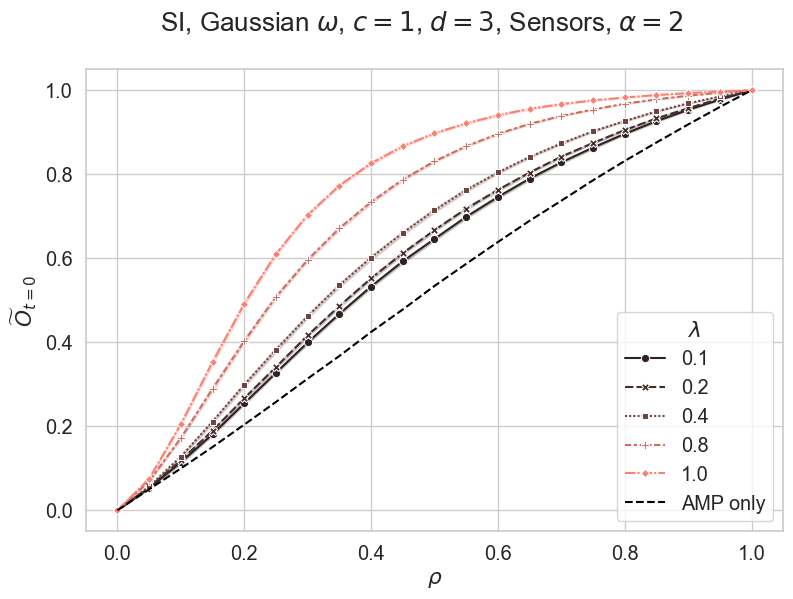

In [ ]:
#df_sens = data_frame.copy()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle(r"SI, Gaussian $\omega$, $c=1$, $d=3$, Sensors, $\alpha=2$ ")
sns.lineplot(data=data_frame_rho, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="dark:salmon", legend="full")
ax.plot(rho_tab, MO_tab, color="black", linestyle="--", label="AMP only")
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='AMP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\lambda$", loc='lower right')
#fig.savefig(f"./figures/Plot_lambda_AMP.pdf")

#### $\lambda$

In [29]:
file_name = "DF_lambda_final.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [30]:
data_frame[r"$\alpha$"] = np.int32(data_frame[r"$N$"]/data_frame[r"$M$"])

In [31]:
data_frame_lam = data_frame[(data_frame[r"$\alpha$"]==1) | (data_frame[r"$\alpha$"]==2) |  (data_frame[r"$\alpha$"]==5) |  (data_frame[r"$\alpha$"]==10) |  (data_frame[r"$\alpha$"]==20) | (data_frame[r"$\alpha$"]==40) ]

In [32]:
from math import erf, sqrt
0.5*(1-erf(1/sqrt(2)))

0.15865525393145707

In [34]:
#Add data BP
file_name = "DF_b.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    df_BP = pickle.load(f)
df_BP = df_BP[df_BP["init"] == "rnd"]
df_BP
#df_BP[r"$\rho$"] = df_BP["M"]
#df_BP[r"$\delta$"] = df_BP["S"]

,init,graph_type,$N$,$d$,$\lambda$,s_type,S,o_type,M,iter_space,...,SE,MSE,$SE_{RND}$,$MSE_{RND}$,$\delta SE$,$R_{SE}$,$R_{MSE}$,$\delta R_{SE}$,ConvChecks,$SE_{mess}$
0,rnd,rrg,20000,3,0.25,delta,0.158655,rho,1.0,100,...,0.532598,0.531753,2.395211,2.406421,0.000845,0.777641,0.779027,-0.001387,"[[10, 0.0006058138875244673, 5.336616349169305...",3.054943e-12
2,rnd,rrg,20000,3,0.80,delta,0.158655,rho,1.0,100,...,0.669589,0.668899,1.330200,1.324452,0.000690,0.496625,0.494962,0.001663,"[[10, 0.038604464474121136, 0.0003121233325146...",6.584671e-12
4,rnd,rrg,20000,3,0.55,delta,0.158655,rho,1.0,100,...,0.632791,0.630152,1.929789,1.917727,0.002639,0.672093,0.671407,0.000686,"[[10, 0.013891839027629832, 0.0001386614403468...",4.996930e-12
6,rnd,rrg,20000,3,0.65,delta,0.158655,rho,1.0,100,...,0.621668,0.618505,1.701251,1.710973,0.003163,0.634582,0.638507,-0.003925,"[[10, 0.037955602284826195, 0.0002225997417655...",3.188929e-12
8,rnd,rrg,20000,3,0.80,delta,0.158655,rho,1.0,100,...,0.660661,0.656740,1.345008,1.344824,0.003921,0.508806,0.511654,-0.002848,"[[10, 0.06839274037559151, 0.00031960573741362...",3.223247e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,rnd,rrg,20000,3,0.65,delta,0.158655,rho,1.0,100,...,0.634919,0.632014,1.682543,1.691399,0.002904,0.622643,0.626336,-0.003693,"[[10, 0.030849824467760578, 0.0002093489106575...",4.426205e-12
752,rnd,rrg,20000,3,0.15,delta,0.158655,rho,1.0,100,...,0.422835,0.420505,2.355698,2.370829,0.002330,0.820506,0.822634,-0.002128,"[[10, 2.6203026317589417e-05, 2.33857339630692...",2.566431e-12
754,rnd,rrg,20000,3,0.30,delta,0.158655,rho,1.0,100,...,0.566095,0.568574,2.375860,2.381064,-0.002479,0.761730,0.761210,0.000520,"[[10, 0.0014604112882549702, 1.248927498933843...",1.663507e-12
756,rnd,rrg,20000,3,0.70,delta,0.158655,rho,1.0,100,...,0.621354,0.629051,1.593511,1.592193,-0.007697,0.610072,0.604915,0.005157,"[[10, 0.038964340381510254, 0.0002588959069350...",3.311831e-12


In [ ]:
#average df_BP values of "MO" over seed and save in a array



In [ ]:
file_name = "DF_lambda_final.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [ ]:
data_frame[r"$\alpha$"] = np.int32(data_frame[r"$N$"]/data_frame[r"$M$"])

In [ ]:
data_frame_lam = data_frame[(data_frame[r"$\alpha$"]==1) | (data_frame[r"$\alpha$"]==2) |  (data_frame[r"$\alpha$"]==5) |  (data_frame[r"$\alpha$"]==10) |  (data_frame[r"$\alpha$"]==20) | (data_frame[r"$\alpha$"]==40) ]

In [ ]:
from math import erf, sqrt
0.5*(1-erf(1/sqrt(2)))

0.15865525393145707

In [ ]:
#Add data BP
file_name = "DF_b.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    df_BP = pickle.load(f)
df_BP = df_BP[df_BP["init"] == "rnd"]
df_BP
#df_BP[r"$\rho$"] = df_BP["M"]
#df_BP[r"$\delta$"] = df_BP["S"]

,init,graph_type,$N$,$d$,$\lambda$,s_type,S,o_type,M,iter_space,...,SE,MSE,$SE_{RND}$,$MSE_{RND}$,$\delta SE$,$R_{SE}$,$R_{MSE}$,$\delta R_{SE}$,ConvChecks,$SE_{mess}$
0,rnd,rrg,20000,3,0.25,delta,0.158655,rho,1.0,100,...,0.532598,0.531753,2.395211,2.406421,0.000845,0.777641,0.779027,-0.001387,"[[10, 0.0006058138875244673, 5.336616349169305...",3.054943e-12
2,rnd,rrg,20000,3,0.80,delta,0.158655,rho,1.0,100,...,0.669589,0.668899,1.330200,1.324452,0.000690,0.496625,0.494962,0.001663,"[[10, 0.038604464474121136, 0.0003121233325146...",6.584671e-12
4,rnd,rrg,20000,3,0.55,delta,0.158655,rho,1.0,100,...,0.632791,0.630152,1.929789,1.917727,0.002639,0.672093,0.671407,0.000686,"[[10, 0.013891839027629832, 0.0001386614403468...",4.996930e-12
6,rnd,rrg,20000,3,0.65,delta,0.158655,rho,1.0,100,...,0.621668,0.618505,1.701251,1.710973,0.003163,0.634582,0.638507,-0.003925,"[[10, 0.037955602284826195, 0.0002225997417655...",3.188929e-12
8,rnd,rrg,20000,3,0.80,delta,0.158655,rho,1.0,100,...,0.660661,0.656740,1.345008,1.344824,0.003921,0.508806,0.511654,-0.002848,"[[10, 0.06839274037559151, 0.00031960573741362...",3.223247e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,rnd,rrg,20000,3,0.65,delta,0.158655,rho,1.0,100,...,0.634919,0.632014,1.682543,1.691399,0.002904,0.622643,0.626336,-0.003693,"[[10, 0.030849824467760578, 0.0002093489106575...",4.426205e-12
752,rnd,rrg,20000,3,0.15,delta,0.158655,rho,1.0,100,...,0.422835,0.420505,2.355698,2.370829,0.002330,0.820506,0.822634,-0.002128,"[[10, 2.6203026317589417e-05, 2.33857339630692...",2.566431e-12
754,rnd,rrg,20000,3,0.30,delta,0.158655,rho,1.0,100,...,0.566095,0.568574,2.375860,2.381064,-0.002479,0.761730,0.761210,0.000520,"[[10, 0.0014604112882549702, 1.248927498933843...",1.663507e-12
756,rnd,rrg,20000,3,0.70,delta,0.158655,rho,1.0,100,...,0.621354,0.629051,1.593511,1.592193,-0.007697,0.610072,0.604915,0.005157,"[[10, 0.038964340381510254, 0.0002588959069350...",3.311831e-12


<Axes: xlabel='$\\lambda$', ylabel='$\\widetilde{O}_{t=0}$'>

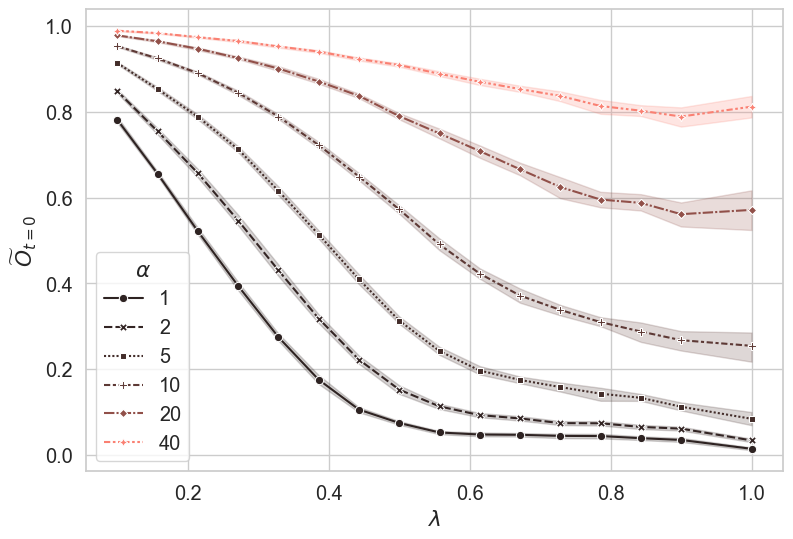

In [ ]:
#df_sens = data_frame.copy()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
sns.lineplot(data=data_frame_lam, x=r"$\lambda$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full")
ax.plot(rho_tab, MO_tab, color="black", linestyle="--", label="AMP only")
#ax.set_xscale("log")
#ax.set_xticks([1,5,10,20,50])
#ax.set_xticklabels([1,5,10,20,50])
#ax.set_yscale("log")
# put the BP only line in the legend along with seaborn lines
ax.legend(handles=handles, labels=labels, title=r"$\alpha$", loc='lower right')
#fig.savefig(f"./figures/Plot_lambda_AMP.pdf")

#### $\lambda$

In [ ]:
file_name = "DF_lambda_final.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [ ]:
data_frame[r"$\alpha$"] = np.int32(data_frame[r"$N$"]/data_frame[r"$M$"])

In [ ]:
data_frame_lam = data_frame[(data_frame[r"$\alpha$"]==1) | (data_frame[r"$\alpha$"]==2) |  (data_frame[r"$\alpha$"]==5) |  (data_frame[r"$\alpha$"]==10) |  (data_frame[r"$\alpha$"]==20) | (data_frame[r"$\alpha$"]==40) ]

In [ ]:
from math import erf, sqrt
0.5*(1-erf(1/sqrt(2)))

0.15865525393145707

In [72]:
#Add data BP
file_name = "DF_b.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    df_BP = pickle.load(f)
df_BP = df_BP[df_BP["init"] == "rnd"]
df_BP.iloc[0,0:15]
#df_BP[r"$\rho$"] = df_BP["M"]
#df_BP[r"$\delta$"] = df_BP["S"]

init               rnd
graph_type         rrg
$N$              20000
$d$                  3
$\lambda$         0.25
s_type           delta
S             0.158655
o_type             rho
M                  1.0
iter_space         100
seed                12
tol           0.000001
n_iter             100
obs_type      snapshot
snap_time          3.0
Name: 0, dtype: object

In [54]:
MO_tab_b = np.concatenate(([], df_BP.groupby(r"$\lambda$")[r"$\widetilde{MO}_{t=0}$"].mean()))
lam_tab_b = np.concatenate(([], sorted(df_BP[r"$\lambda$"].unique())))

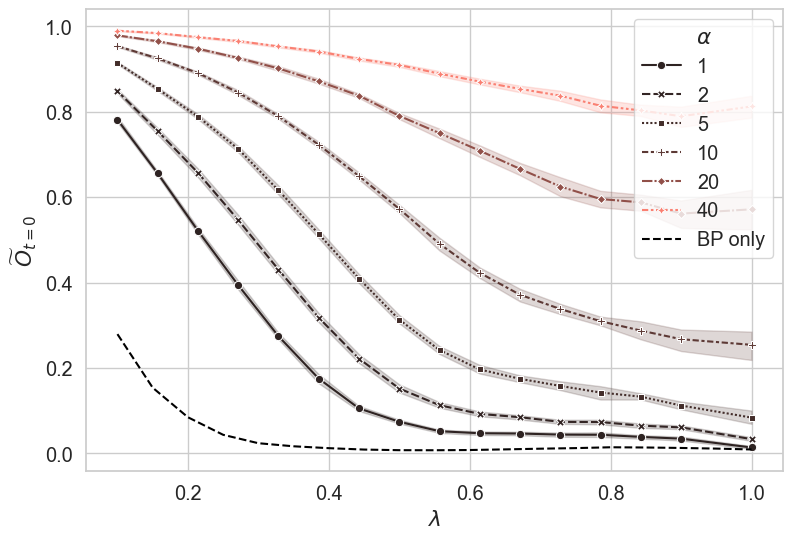

In [ ]:
#df_sens = data_frame.copy()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
sns.lineplot(data=data_frame_lam, x=r"$\lambda$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full")
ax.plot(lam_tab_b, MO_tab_b, color="black", linestyle="--", label="BP only")
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\alpha$", loc='upper right')
#fig.savefig(f"./figures/Plot_lambda_AMP.pdf")

#### panel c

In [58]:
file_name = "DF_20250805-090449_384.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [59]:
data_frame[r"$\alpha$"] = np.int32(data_frame[r"$N$"]/data_frame[r"$M$"])

In [74]:
#Add data BP
file_name = "DF_c.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    df_BP = pickle.load(f)
df_BP = df_BP[df_BP["init"] == "rnd"]
df_BP
df_BP[r"$\rho$"] = df_BP["M"]
df_BP[r"$\delta$"] = df_BP["S"]
df_BP.iloc[0,0:15]

init               rnd
graph_type         rrg
$N$              20000
$d$                  3
$\lambda$          0.2
s_type           delta
S             0.158655
o_type             rho
M                 0.05
iter_space         100
seed                10
tol           0.000001
n_iter             100
obs_type       sensors
snap_time           -1
Name: 0, dtype: object

In [66]:
MO_tab_c = df_BP.groupby(r"$\rho$")[r"$\widetilde{MO}_{t=0}$"].mean()
rho_tab_c = sorted(df_BP[r"$\rho$"].unique())

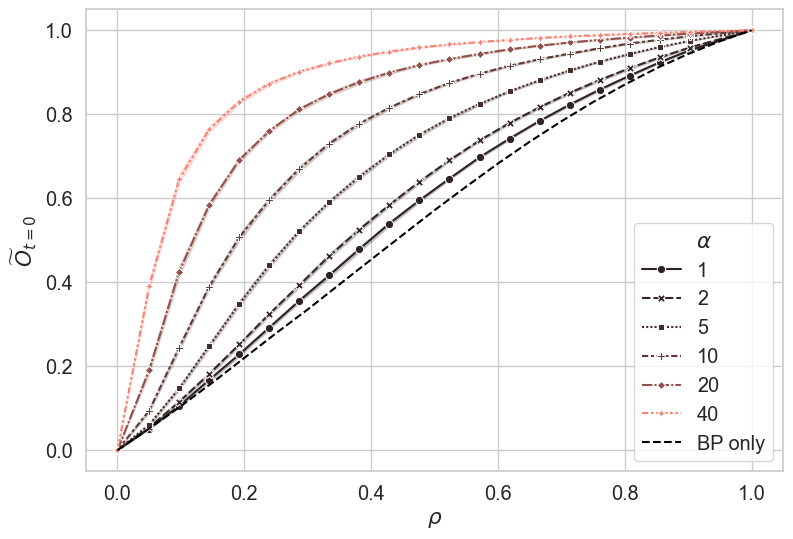

In [68]:
#df_sens = data_frame.copy()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
sns.lineplot(data=data_frame, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full")
ax.plot(rho_tab_c, MO_tab_c, color="black", linestyle="--", label="BP only")
#ax.set_xscale("log")
#ax.set_xticks([1,5,10,20,50])
#ax.set_xticklabels([1,5,10,20,50])
#ax.set_yscale("log")
# put the BP only line in the legend along with seaborn lines
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\alpha$", loc='lower right')

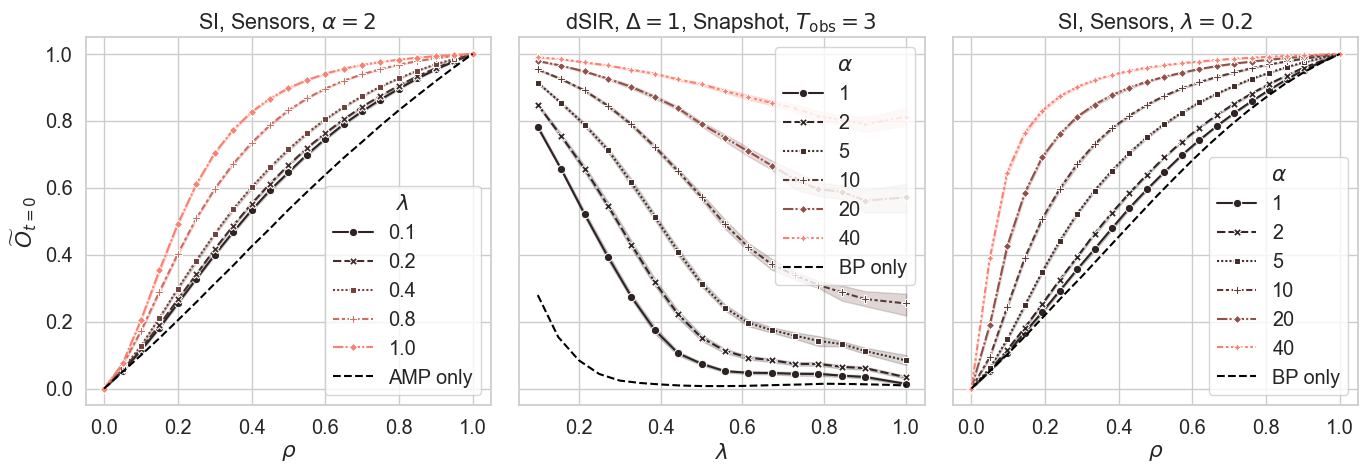

In [77]:
#df_sens = data_frame.copy()

fig,axs = plt.subplots(1, 3, figsize=(14,5), sharey=True)
#fig.suptitle(r"SI, Gaussian $\omega$, $c=1$, $d=3$, Sensors, $\alpha=2$ ")
ax = axs[0]
ax.title.set_text(r"SI, Sensors, $\alpha=2$ ")
sns.lineplot(data=data_frame_rho, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="dark:salmon", legend="full", ax=ax)
ax.plot(rho_tab, MO_tab, color="black", linestyle="--", label="AMP only")
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='AMP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\lambda$", loc='lower right')

ax = axs[1]
ax.title.set_text(r"dSIR, $\Delta=1$, Snapshot, $T_{\rm obs}=3$ ")
sns.lineplot(data=data_frame_lam, x=r"$\lambda$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full", ax=ax)
ax.plot(lam_tab_b, MO_tab_b, color="black", linestyle="--", label="BP only")
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\alpha$", loc='upper right')

ax = axs[2]
ax.title.set_text(r"SI, Sensors, $\lambda=0.2$")

sns.lineplot(data=data_frame, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full")
ax.plot(rho_tab_c, MO_tab_c, color="black", linestyle="--", label="BP only")
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\alpha$", loc='lower right')

fig.tight_layout()
fig.savefig(f"../Plots/Figure2.pdf")